## Econometric Analysis of Race and Ethnicity on Earnings Gap 
## Course: Applied Econometrics

### Setting-up

In [1]:
# Load the libraries
library(tidyverse)
library(psych)
library(corrplot)
library(stargazer)
library(sandwich)
library(lmtest)

options(message = -1)
options(warn = -1)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

corrplot 0.84 loaded

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



### Data pre-processing

In [2]:
# load the sampled office sales data
lma <- read.csv("C:/GitHub/Econometric Analysis of Labour Market/ACS_Data.csv", header = TRUE)

# Verify data loaded
glimpse(lma)

Observations: 64,999
Variables: 26
$ Age                                    <int> 18, 53, 61, 32, 49, 58, 18, ...
$ Earnings.Past.12.Months                <int> 1200, 0, 0, 350, 0, 0, 0, 0,...
$ Usual.Weekly.Hours                     <int> 16, NA, 70, 24, 30, NA, NA, ...
$ Female                                 <int> 0, 1, 0, 1, 0, 0, 0, 1, 0, 0...
$ Married                                <int> 0, 0, 1, 0, 0, 1, 0, 0, 1, 1...
$ No.High.School.Degree                  <int> 1, 0, 0, 0, 0, 1, 1, 0, 0, 0...
$ High.School.Degree.or.GED              <int> 0, 1, 0, 0, 0, 0, 0, 0, 1, 0...
$ Some.College                           <int> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0...
$ Associates.Degree                      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...
$ Bachelors.Degree                       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Masters.Degree                         <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0...
$ Professional.Degree                    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Doctorate      

#### There are 64,999 observations of Labor Market Data having 26 variables 
#### Three variables "Age", "Earnings.Past.12.Months" and "Usual.Weekly.Hours" are numerical, 
+ All other variables are categorical but defined as integers so will need to convert them to factor variables 
+ Before that we will look at the summary of the data as we will need to look at the Min., Max. and Proportions

### Univariate non-graphical analysis

In [3]:
stargazer(lma, type="text", header=FALSE, median=TRUE)


Statistic                                N       Mean     St. Dev.   Min  Pctl(25) Median Pctl(75)   Max  
----------------------------------------------------------------------------------------------------------
Age                                    64,999   41.689     13.734    18      30      43      54      64   
Earnings.Past.12.Months                64,999 29,776.370 45,915.830   0      0     16,000  42,000  577,000
Usual.Weekly.Hours                     48,868   38.513     12.847   1.000  35.000  40.000  42.000  99.000 
Female                                 64,999   0.508      0.500      0      0       1       1        1   
Married                                64,999   0.531      0.499      0      0       1       1        1   
No.High.School.Degree                  64,999   0.123      0.329      0      0       0       0        1   
High.School.Degree.or.GED              64,999   0.276      0.447      0      0       0       1        1   
Some.College                        

#### Age 
+ Minimum Age is 18 Years and Maximum Age is 64 years 
+ Average Age is 41.7 Years
+ 25% individuals are between 18 to 30 Years (both included)
+ 75% individuals are between 18 to 54 Years (both included)
        
#### Earnings.Past.12.Months 
+ Earnings in the past 12 months, range from "Nil" to over half a million   
+ The Median earnings in the past 12 months was $16000     
+ Average earnings in the past 12 months was $29776 
+ 25% individuals have had zero earnings 
+ Many individuals in this group could be in the 18-25 years age group
+ Some others might be those who do not earn themselves but somebody else in their household does    
          
#### Usual.Weekly.Hours
+ Usual Weekly Hours, range from  "1 hour" to "99 hours"   
+ However there are large number of missing values 16131 which may pertain to individuals with zero Earnings  
+ The Median weekly hours are  40 hours 
+ However, the average weekly hours is lesser by an hour than the median indicating   
       
#### Gender
+ The sample has almost equal proportions of males and females, Females being 50.8% of the sample    
    
#### Marital Status
+ 53.1% of individuals are married or "now married", to be more 
+ Others include never married, divorced, separated etc.

#### Worked.40..Weeks.During.Past.12.Months 
+ 60.9% individuals worked 40 weeks or more, in the last 12 months  

#### Worked.35..Hours.in.a.Typical.Week
+ 57.2% of individuals worked 35 hours or more, in a typical week 

#### Educational.Attainment
+ At 27.6%, "High School Degree" happens to be the most common educational attainment, in the sample   
+ 17.8% of individuals completed their "Bachelors" degree
+ 12.3% of individuals do not have a high school degree
    
#### Race. Ethnicity
+ At 67.5%, "Whites" is the most common race/ethnicity, in the sample    
+ Whites are followed by Hispanics at 13.6% of individuals 
+ 11.1% of individuals are "Black"

### Converting categorical variables to factor variables  

In [4]:
# Convert Educational Attainment varriables as factor variables: 10 variables 
lma$Female <- as.factor(lma$Female)
lma$Married <- as.factor(lma$Married)
lma$No.High.School.Degree <- as.factor(lma$No.High.School.Degree)
lma$High.School.Degree.or.GED <- as.factor(lma$High.School.Degree.or.GED)  
lma$Some.College <- as.factor(lma$Some.College)
lma$Associates.Degree <- as.factor(lma$Associates.Degree)
lma$Bachelors.Degree <- as.factor(lma$Bachelors.Degree)
lma$Masters.Degree <- as.factor(lma$Masters.Degree)
lma$Professional.Degree <- as.factor(lma$Professional.Degree)
lma$Doctorate <- as.factor(lma$Doctorate)

# Convert Race Ethnicity varriables as factor variables: 8 variable
lma$White <- as.factor(lma$White) 
lma$Black <-as.factor(lma$Black)
lma$American.Indian.or.Native.American <-as.factor(lma$American.Indian.or.Native.American)
lma$Asian <-as.factor(lma$Asian)
lma$Hawaiian.or.Pacific.Islander <- as.factor(lma$Hawaiian.or.Pacific.Islander)
lma$Other.Race <-as.factor(lma$Other.Race ) 
lma$Biracial <- as.factor(lma$Biracial)
lma$Hispanic <- as.factor(lma$Hispanic)

# Convert Emplyment varriables as factor variables: 3 variable
lma$Employed <- as.factor(lma$Employed)
lma$Worked.40..Weeks.During.Past.12.Months <- as.factor(lma$Worked.40..Weeks.During.Past.12.Months)
lma$Worked.35..Hours.in.a.Typical.Week <- as.factor(lma$Worked.35..Hours.in.a.Typical.Week)


### Univariate graphical analysis

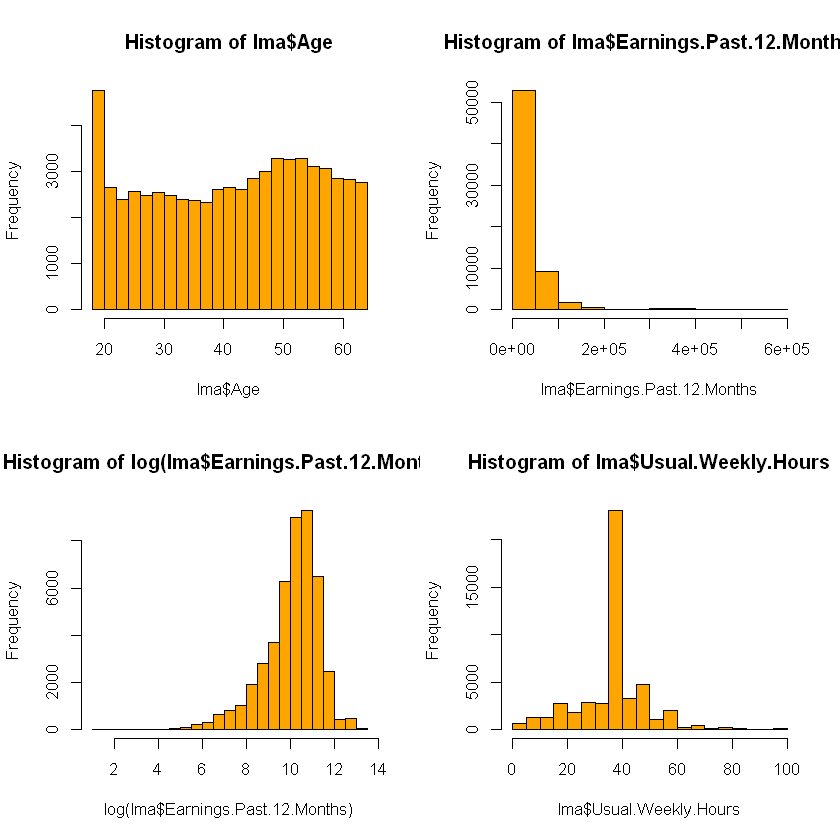

In [5]:
# Verify observations from summary()
par(mfrow=c(2,2))
  hist(lma$Age, col = "orange")
  hist(lma$Earnings.Past.12.Months, col = "orange")
  hist(log(lma$Earnings.Past.12.Months), col = "orange")
  hist(lma$Usual.Weekly.Hours, col = "orange")

#### Age
+ Generally, uniform distribution of ages
+ Peak at 18 years and a slight bump around 50 years
    
#### Earnings.Past.12.Monts
+ Most earnings, including the zero-level, are within USD 100,000

#### Usual Weekly Hours
+ Peak around 35-40 hours per week
+ However, distribution has a positive tail stretching beyond 60 hours per week

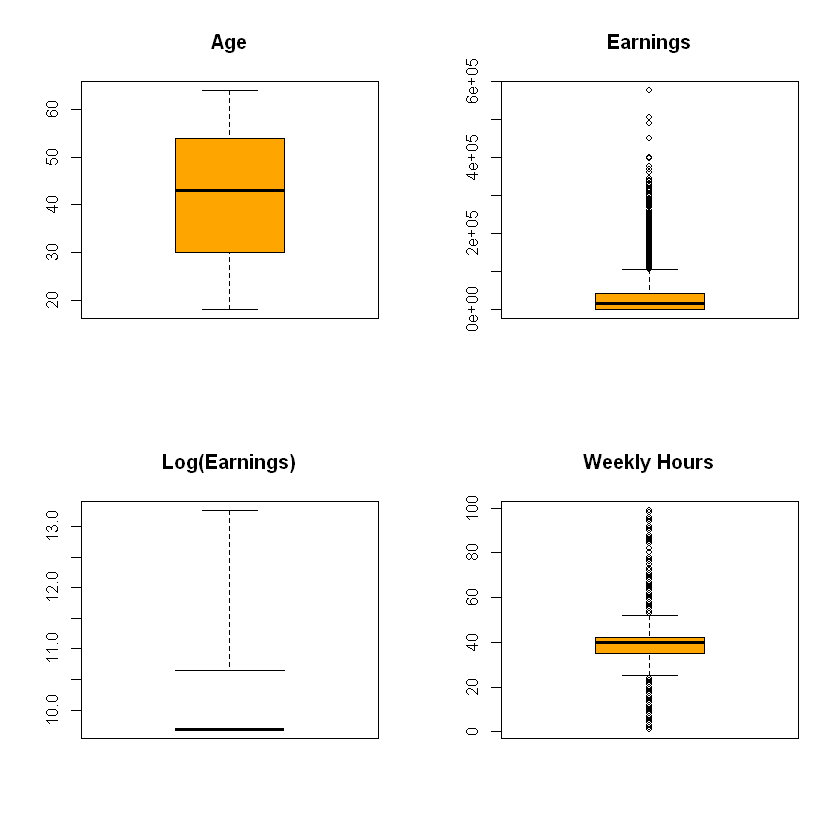

In [6]:
# Verify observations from summary()

par(mfrow=c(2,2))
  boxplot(lma$Age, main="Age", col = "orange")
  boxplot(lma$Earnings.Past.12.Months, main="Earnings", col = "orange")
  boxplot(log(lma$Earnings.Past.12.Months), main="Log(Earnings)", col = "orange")
  boxplot(lma$Usual.Weekly.Hours, main="Weekly Hours", col = "orange")

#### Boxplot confirms median and range of ages we observed earlier in the non-graphical summaries 

#### Earnings are skewed to the lower levels

#### Weekly hours has long whiskers at both below the lower quartile and the higher quartile 

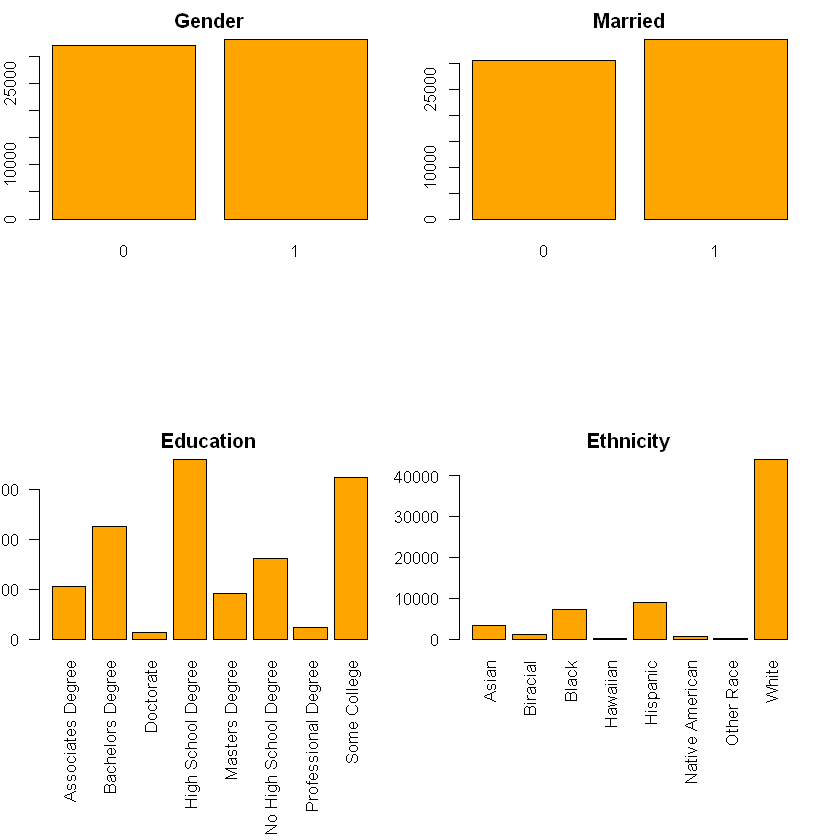

In [7]:
# Visually confirm findings from summary()
par(mfrow=c(2,2), mar = c(10, 2, 2, 2))
  barplot(table(lma$Female), main = "Gender", col = "orange")
  barplot(table(lma$Married), main = "Married", col = "orange")
  barplot(table(lma$Educational.Attainment), main = "Education", las=2, col = "orange")
  barplot(table(lma$Race.Ethnicity), main = "Ethnicity", las=2, col = "orange")

#### Gender
+ As seen before, almost equal distribution between male/female

#### Married
+ Slightly more married than non-married

#### Education
+ "Some College" and "High School Degree" has the highest proportion
+ Next highest is "Bachelors" and then "No High School"
+ Lowest proportions is that of "Doctorate""

#### Ethnicity
+ White is the largest ethnic group 
+ Individuals under "Other Race", "Biracial"" and "Hawaiian" form smaller groups
+ Are these percentages similar to whole population?

### Multivariate non-graphical analysis 

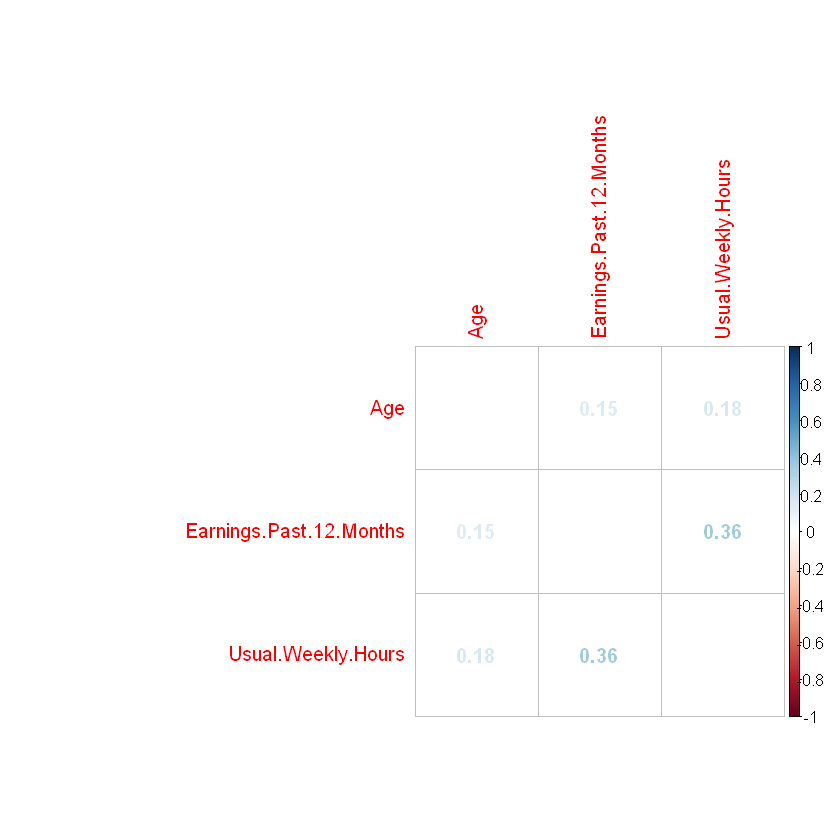

In [8]:
lma %>%
  select(Age, Earnings.Past.12.Months, Usual.Weekly.Hours) %>%
  cor(use="pairwise.complete.obs", method="pearson") %>%
  corrplot(type="full", method="number", diag=FALSE)

#### Some correlation between Usual.Weekly.Hours and Earnings.Past.12.Months

#### Low correlation between Age and Earnings.Past.12.Months

#### Collinearity should not be a concern if we use these variable in a model

In [9]:
# Inspect intersection of Education and Ethnicity
# set options for better display
options(scipen=999)
options(digits=1)
addmargins(prop.table(table(lma$Educational.Attainment, lma$Race.Ethnicity)))

# reset options
options(scipen=0)
options(digits=7)

,Asian,Biracial,Black,Hawaiian,Hispanic,Native American,Other Race,White,Sum
Associates Degree,0.003,0.00143,0.0078,0.00008,0.0075,0.00057,0.00009,0.060,0.08
Bachelors Degree,0.014,0.00229,0.0114,0.00012,0.0119,0.00052,0.00022,0.133,0.17
Doctorate,0.002,0.00009,0.0006,0.00000,0.0003,0.00002,0.00000,0.008,0.01
High School Degree,0.008,0.00418,0.0346,0.00046,0.0377,0.00386,0.00031,0.187,0.28
Masters Degree,0.006,0.00095,0.0052,0.00002,0.0039,0.00020,0.00008,0.053,0.07
No High School Degree,0.006,0.00166,0.0194,0.00012,0.0432,0.00208,0.00017,0.051,0.12
Professional Degree,0.002,0.00034,0.0006,0.00000,0.0014,0.00002,0.00002,0.014,0.02
Some College,0.009,0.00528,0.0313,0.00032,0.0297,0.00249,0.00020,0.170,0.25
Sum,0.051,0.01623,0.1107,0.00112,0.1357,0.00975,0.00108,0.675,1.00


#### As we had observed earlier, "White" is the largest ethnic group  with "OtherRace" the lowest
+ "Hawaiin", "Native American" and "Other Race", each make less than 1% of the sample   

#### "White-High School Degree" is the highest proportion of Race-Education group 

In [10]:
# Inspect intersection of Married and Gender
levels(lma$Female) = c('Male','Female')
levels(lma$Married) = c('Unmarried', 'Married')
lma$Married <- as.factor(lma$Married)
addmargins(prop.table(table(lma$Married, lma$Female)))

,Male,Female,Sum
Unmarried,0.2330497,0.2356344,0.4686841
Married,0.2587578,0.2725580,0.5313159
Sum,0.4918076,0.5081924,1.0000000


#### Very similar distribution across all four quadrants
+ However, females have higher percentage within the married group 

In [11]:
# Inspect intersection of Education and Gender
addmargins(prop.table(table(lma$Educational.Attainment , lma$Female)))

,Male,Female,Sum
Associates Degree,0.033969753,0.046662256,0.08063201
Bachelors Degree,0.080401237,0.093432207,0.17383344
Doctorate,0.005984707,0.004261604,0.01024631
High School Degree,0.144294528,0.131694334,0.27598886
Masters Degree,0.029738919,0.039769843,0.06950876
No High School Degree,0.069370298,0.054046985,0.12341728
Professional Degree,0.009861690,0.008015508,0.01787720
Some College,0.118186434,0.130309697,0.24849613
Sum,0.491807566,0.508192434,1.00000000


#### Similar distribution of gender across all Educational Attainments

In [12]:
# Inspect intersection of Education and Married
addmargins(prop.table(table(lma$Educational.Attainment , lma$Married)))

,Unmarried,Married,Sum
Associates Degree,0.032538962,0.048093048,0.08063201
Bachelors Degree,0.064062524,0.109770920,0.17383344
Doctorate,0.002938507,0.007307805,0.01024631
High School Degree,0.137417499,0.138571363,0.27598886
Masters Degree,0.020892629,0.048616133,0.06950876
No High School Degree,0.069877998,0.053539285,0.12341728
Professional Degree,0.005092386,0.012784812,0.01787720
Some College,0.135863629,0.112632502,0.24849613
Sum,0.468684134,0.531315866,1.00000000


#### Similar distribution of of married/unmarried across all Educational Attainments
+ Largest difference in Married Bachelors and Married Professional Degrees compared to Unmarried.

### Multivariate graphical analysis 

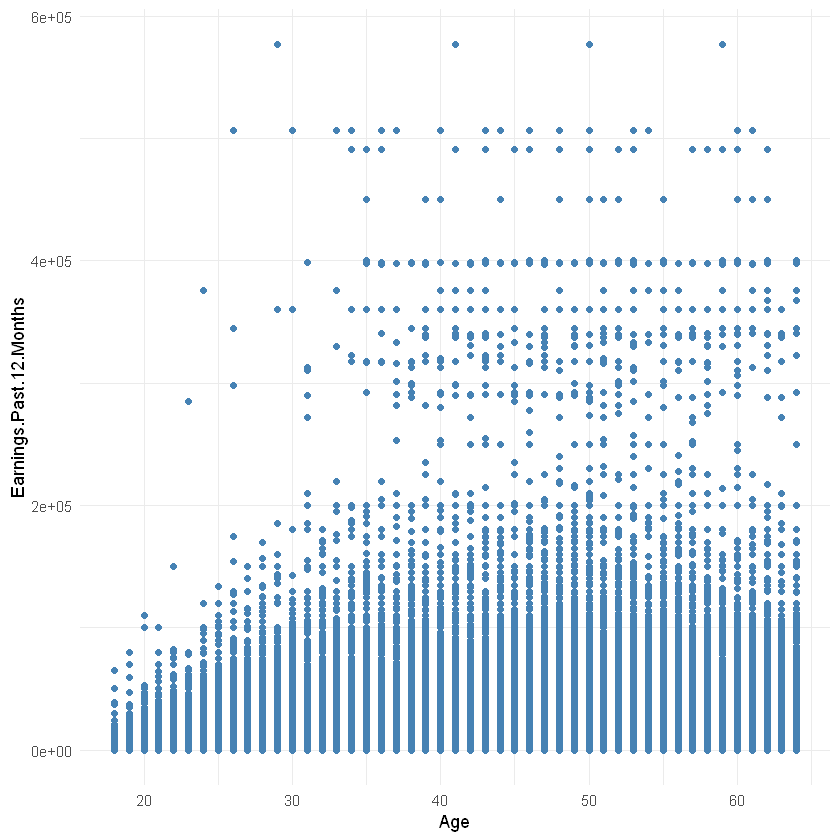

In [13]:
lma %>%
  select(Age, Earnings.Past.12.Months) %>%
  ggplot(aes(x = Age, y = Earnings.Past.12.Months)) +
  geom_point(color = "steelblue")+
  theme_minimal()

#### Earnings increase with age,

#### Although the earnings seems to peak at around 35 years, the distribution becomes similar beyond this age and up to age 64

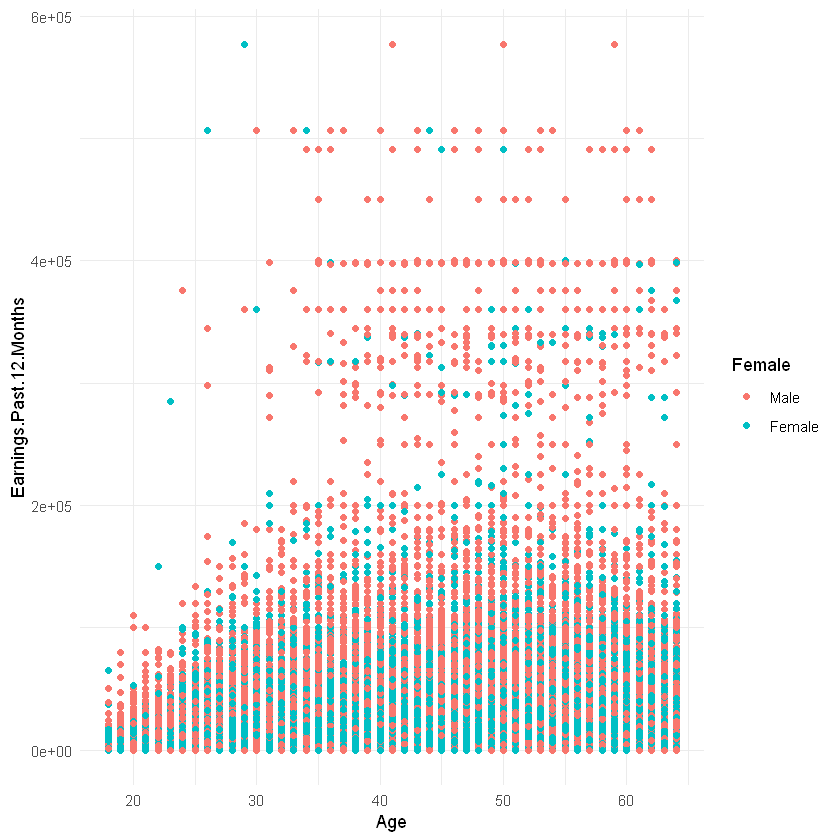

In [14]:
# How do age and earnings look with gender
lma %>%
  select(Age, Earnings.Past.12.Months, Female) %>%
  ggplot(aes(x = Age, y = Earnings.Past.12.Months, color = Female)) +
  geom_point()+
  theme_minimal()

#### Females lag behind males in earnings, across all ages,  

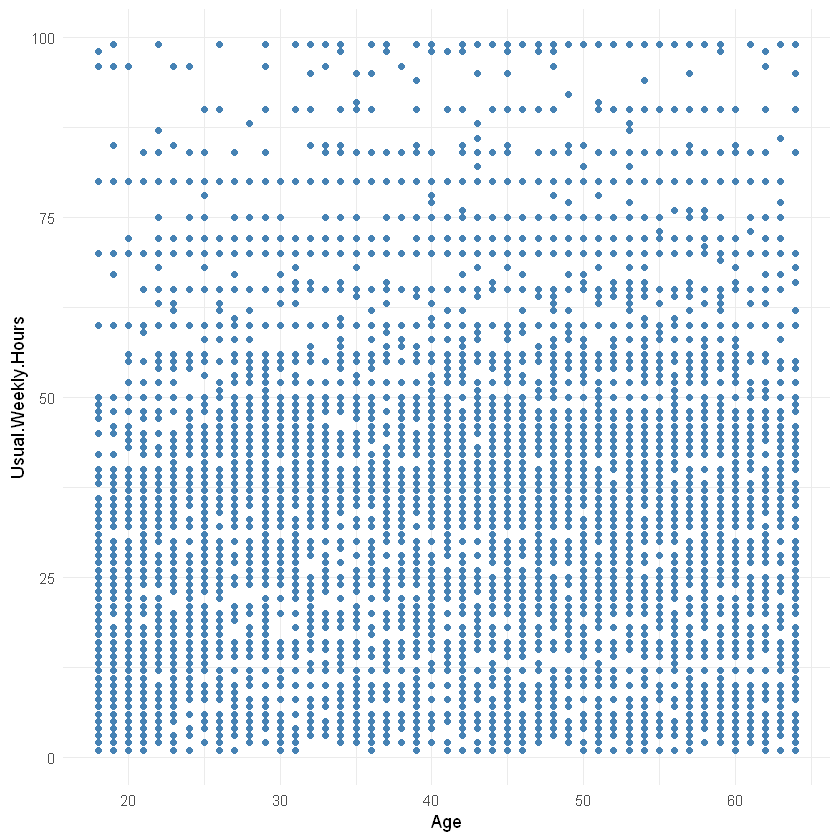

In [15]:
lma %>%
  select(Age, Usual.Weekly.Hours) %>%
  ggplot(aes(x = Age, y = Usual.Weekly.Hours)) +
  geom_point(color = "steelblue")+
  theme_minimal()

#### For 16131 rows in the sample, usual weekly hours data has missing values

#### Usual weekly hours has a similar distribution across ages

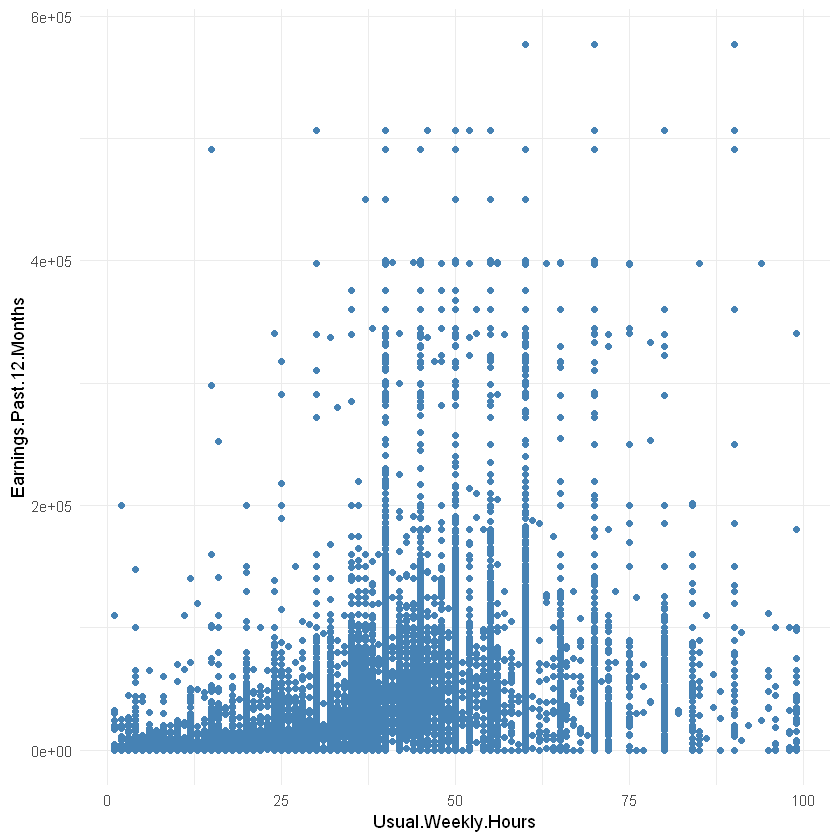

In [16]:
lma %>%
  select(Earnings.Past.12.Months, Usual.Weekly.Hours) %>%
  ggplot(aes(x = Usual.Weekly.Hours, y = Earnings.Past.12.Months)) +
  geom_point(color = "steelblue") + 
  theme_minimal()

#### Earnings increase with weekly hours, with largest earnings between 40 and 60 (approx.)

#### Earnings decline as the weekly hours go beyond 60 hours 

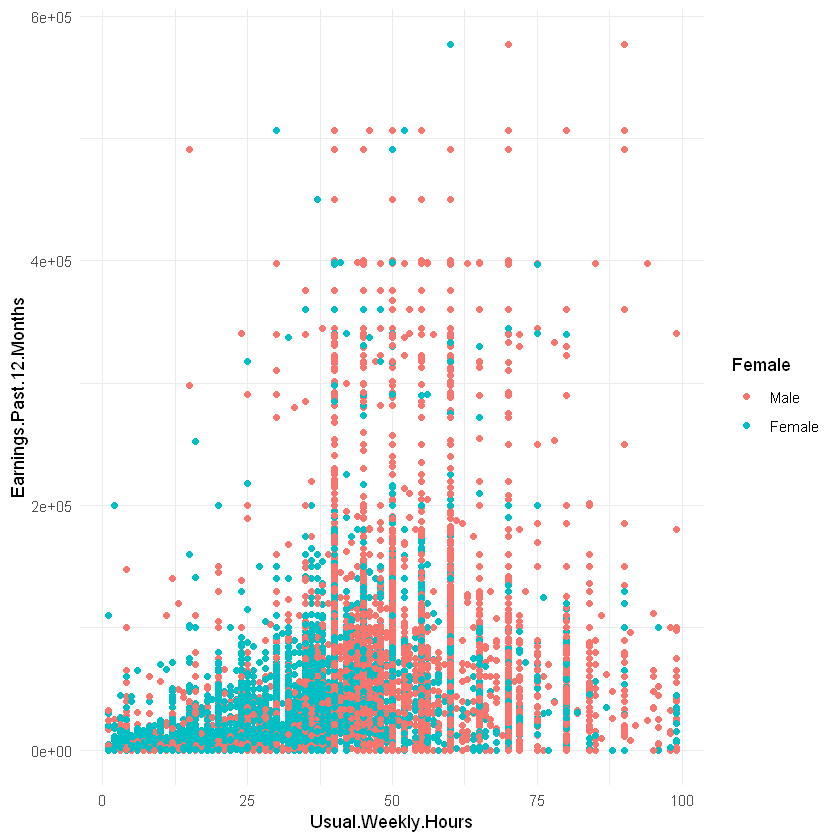

In [17]:
# How does the distrbution of weekly hours and earnings look with gender
lma %>%
  select(Earnings.Past.12.Months, Usual.Weekly.Hours, Female) %>%
  ggplot(aes(x = Usual.Weekly.Hours, y = Earnings.Past.12.Months, color=Female)) +
  geom_point()+
  theme_minimal()

#### Longer weekly hours and higher earnings are dominated by males 

#### Conversely, the lower ends are represented more by females 

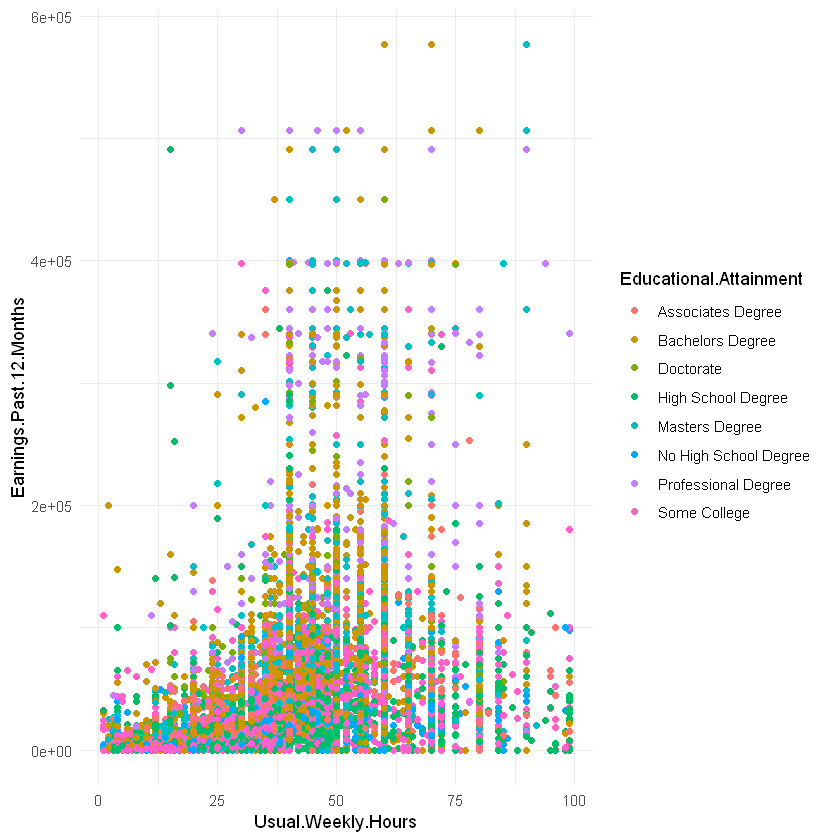

In [18]:
# How does the distrbution of weekly hours and earnings look with education
lma %>%
  select(Earnings.Past.12.Months, Usual.Weekly.Hours, Educational.Attainment) %>%
  ggplot(aes(x = Usual.Weekly.Hours, y = Earnings.Past.12.Months, color=Educational.Attainment)) +
  geom_point()+
  theme_minimal()

## Sample Selection Criteria

Observing the large range of Earnings and Usual Weekly Hours, including some individuals reporting 0 earnings, we decided we wanted to focus on the full time employed. Since we do not have detail on hours worked weekly for the entire year, we decided to limit our record set to those individuals with earnings about the federal minimum wage in 2011.  The federal minimum wage in 2011 was *USD 7.25* per hour and if we assume 2080 hours in a typical work year that years a minimum earnings of *USD 15,080*.  We also look to work only with individuals that are employed.

Based upon feedback, we will also filter those individuals to ones that have worked 40 or more weeks in the past 12 months and worked 35 or more hours in a typical week.

In [19]:
lma_filtered <- filter(lma, Earnings.Past.12.Months >= 15080 & Worked.40..Weeks.During.Past.12.Months == 1 & Worked.35..Hours.in.a.Typical.Week == 1)
nrow(lma_filtered)

[1] 29067

#### Thus, we have selected a subset of 29067 for our econometric model,from the original sample of 64999

In [20]:
summary(lma_filtered)

      Age        Earnings.Past.12.Months Usual.Weekly.Hours    Female     
 Min.   :18.00   Min.   : 15100          Min.   :35.00      Male  :16291  
 1st Qu.:34.00   1st Qu.: 30000          1st Qu.:40.00      Female:12776  
 Median :45.00   Median : 45000          Median :40.00                    
 Mean   :43.58   Mean   : 58681          Mean   :44.03                    
 3rd Qu.:53.00   3rd Qu.: 68000          3rd Qu.:46.00                    
 Max.   :64.00   Max.   :577000          Max.   :99.00                    
                                                                          
      Married      No.High.School.Degree High.School.Degree.or.GED Some.College
 Unmarried:10535   0:27264               0:22028                   0:22683     
 Married  :18532   1: 1803               1: 7039                   1: 6384     
                                                                               
                                                                               


#### Age appears symmetrical with Median and Mean approximately equalling 
+ Age rage is maintained - 18 - 64 years of age
    
#### Earnings are now between USD 15,100 and  USD 577,000
+ Earnings are slightly skewed to the negative tail, with Median less than Mean
    
* Usual Weekly Hours are now between 35 and 99
+ Mean and median are approximately equal at around 40 hours, which is considered as a full-time employment
    
#### All individuals in the subset are employed

In [21]:
stargazer(lma_filtered, type="text", header=FALSE, median=TRUE)


Statistic                 N       Mean     St. Dev.   Min   Pctl(25) Median Pctl(75)   Max  
--------------------------------------------------------------------------------------------
Age                     29,067   43.578     11.507     18      34      45      53      64   
Earnings.Past.12.Months 29,067 58,681.440 53,998.470 15,100  30,000  45,000  68,000  577,000
Usual.Weekly.Hours      29,067   44.031     8.116      35      40      40      46      99   
--------------------------------------------------------------------------------------------


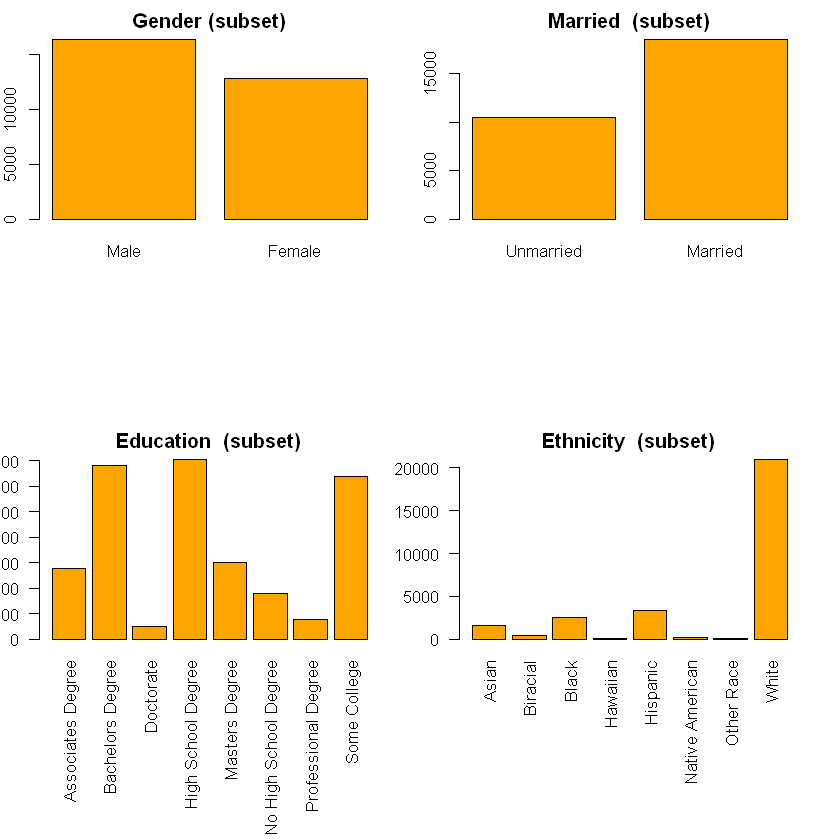

In [22]:
# Visually confirm findings from summary()
par(mfrow=c(2,2), mar = c(10, 2, 2, 2))
  barplot(table(lma_filtered$Female), main = "Gender (subset)",col = "orange")
  barplot(table(lma_filtered$Married), main = "Married  (subset)",col = "orange")
  barplot(table(lma_filtered$Educational.Attainment), main = "Education  (subset)", las=2,col = "orange")
  barplot(table(lma_filtered$Race.Ethnicity), main = "Ethnicity  (subset)", las=2,col = "orange")

#### Gender distribution slightly skewed to Males now 

#### Skew also observed towards Married individuals 

#### Education
+ Proportion of Bachelors degrees has now increased  
+ Proportion of Masters degrees has also increased
+ Proportion of No High School degree has decreased

#### Distribution of ethnicities is approximately the same as it was in the original sample   

In [23]:
# What is the percentage by gender?
prop.table(as.matrix(table(lma_filtered$Female)))*100

Male,56.04638
Female,43.95362


In [24]:
# What is the percentage by marital status?
prop.table(as.matrix(table(lma_filtered$Married)))*100

Unmarried,36.24385
Married,63.75615


In [25]:
# What is the percentage by ethnicity?
prop.table(as.matrix(table(lma_filtered$Race.Ethnicity)))*100

Asian,5.3497093
Biracial,1.3451681
Black,8.8106788
Hawaiian,0.1032098
Hispanic,11.5663811
Native American,0.6261396
Other Race,0.1100905
White,72.0886228


In [26]:
# What is the percentage by education?
prop.table(as.matrix(table(lma_filtered$Educational.Attainment)))*100

Associates Degree,9.560670
Bachelors Degree,23.421750
Doctorate,1.637596
High School Degree,24.216465
Masters Degree,10.310662
No High School Degree,6.202911
Professional Degree,2.686896
Some College,21.963051


In [27]:
# Inspect intersection of Education and Ethnicity
# set options for better display
options(scipen=999)
options(digits=1)
addmargins(prop.table(table(lma_filtered$Educational.Attainment, lma_filtered$Race.Ethnicity)))

# reset options
options(scipen=0)
options(digits=7)

,Asian,Biracial,Black,Hawaiian,Hispanic,Native American,Other Race,White,Sum
Associates Degree,0.004,0.0015,0.008,0.00010,0.0089,0.0006,0.00017,0.07,0.10
Bachelors Degree,0.018,0.0031,0.015,0.00021,0.0149,0.0006,0.00024,0.18,0.23
Doctorate,0.003,0.0001,0.001,0.00000,0.0004,0.0000,0.00000,0.01,0.02
High School Degree,0.007,0.0028,0.024,0.00045,0.0313,0.0023,0.00038,0.17,0.24
Masters Degree,0.009,0.0011,0.008,0.00003,0.0057,0.0002,0.00010,0.08,0.10
No High School Degree,0.004,0.0003,0.006,0.00007,0.0271,0.0006,0.00007,0.02,0.06
Professional Degree,0.003,0.0006,0.001,0.00000,0.0019,0.0000,0.00003,0.02,0.03
Some College,0.006,0.0040,0.025,0.00017,0.0253,0.0019,0.00010,0.16,0.22
Sum,0.053,0.0135,0.088,0.00103,0.1157,0.0063,0.00110,0.72,1.00


#### Highest proportion is White High School Degree

#### White has the highest percentage but now Hawaiian the lowest (previously it was the Other Race)

#### High School Degree has the highest percentage with Doctorate the lowest

In [28]:
# Inspect intersection of Married and Gender
addmargins(prop.table(table(lma_filtered$Married, lma_filtered$Female)))

,Male,Female,Sum
Unmarried,0.1779337,0.1845048,0.3624385
Married,0.3825300,0.2550315,0.6375615
Sum,0.5604638,0.4395362,1.0000000


#### Married Male individuals are now the highest proportion, in the original sample it was Married-Female 

#### Lowest are Unmarried Males (although unmarried females not far behind)

In [29]:
# Inspect intersection of Education and Gender
addmargins(prop.table(table(lma_filtered$Educational.Attainment , lma_filtered$Female)))

,Male,Female,Sum
Associates Degree,0.04668524,0.048921457,0.09560670
Bachelors Degree,0.12464307,0.109574431,0.23421750
Doctorate,0.01042419,0.005951767,0.01637596
High School Degree,0.14769326,0.094471394,0.24216465
Masters Degree,0.05002236,0.053084254,0.10310662
No High School Degree,0.04345134,0.018577769,0.06202911
Professional Degree,0.01620394,0.010665015,0.02686896
Some College,0.12134035,0.098290157,0.21963051
Sum,0.56046376,0.439536244,1.00000000


#### Similar percentages of gender across most Educational Attainments
+ Largest difference between Males with High School Degree over Females with High School Degree

In [30]:
# Inspect intersection of Education and Married
addmargins(prop.table(table(lma_filtered$Educational.Attainment , lma_filtered$Married)))

,Unmarried,Married,Sum
Associates Degree,0.034093646,0.06151306,0.09560670
Bachelors Degree,0.081673375,0.15254412,0.23421750
Doctorate,0.004300409,0.01207555,0.01637596
High School Degree,0.092888843,0.14927581,0.24216465
Masters Degree,0.030274882,0.07283173,0.10310662
No High School Degree,0.025079988,0.03694912,0.06202911
Professional Degree,0.007155881,0.01971308,0.02686896
Some College,0.086971480,0.13265903,0.21963051
Sum,0.362438504,0.63756150,1.00000000


#### In general, more Married individuals over Unmarried ones, at different education levels
+ However, No High School degree has almost the same distribution between Unmarred and Married

In [31]:
# Filter out under represented ethnicities 
lma_filtered_ethnicity <- filter(lma_filtered, Race.Ethnicity %in% c("Asian", "Black", "Hispanic", "White"))

#### Setup refrence ranges (No High School Degree and White)

In [32]:
# Setup reference ranges
lma_filtered_ethnicity$Race.Ethnicity = factor(lma_filtered_ethnicity$Race.Ethnicity, levels=c("White", "Asian", "Black", "Hispanic"))

lma_filtered_ethnicity$Educational.Attainment = factor(lma_filtered_ethnicity$Educational.Attainment, 
                                                       levels=c("No High School Degree", "High School Degree",
                                                                "Some College", "Associates Degree",
                                                                "Bachelors Degree",
                                                                "Professional Degree", "Masters Degree",
                                                                "Doctorate"))

lma_filtered_ethnicity$Educational.Attainment = factor(lma_filtered_ethnicity$Educational.Attainment,
                                                       levels=c("No High School Degree", 
                                                                "High School Degree",
                                                                "Some College", 
                                                                "Associates Degree",
                                                                "Bachelors Degree",
                                                                "Professional Degree", 
                                                                "Masters Degree",
                                                                "Doctorate"))

## Research questions : 
#### Q1. How do earnings vary by educational attainment?
#### Q2. Does the relationship between age and educational attainment vary by race/ethnicity?

### Preliminary Econometric Estimates

In [33]:
prelim <- lm(Earnings.Past.12.Months ~ Age + Female + Married + Educational.Attainment + Race.Ethnicity, data = lma_filtered_ethnicity)
summary(prelim)


Call:
lm(formula = Earnings.Past.12.Months ~ Age + Female + Married + 
    Educational.Attainment + Race.Ethnicity, data = lma_filtered_ethnicity)

Residuals:
    Min      1Q  Median      3Q     Max 
-153206  -21445   -6670   10073  521440 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 8591.49    1668.74   5.148 2.64e-07
Age                                          690.64      25.24  27.363  < 2e-16
FemaleFemale                              -19457.61     572.87 -33.965  < 2e-16
MarriedMarried                              7149.41     607.39  11.771  < 2e-16
Educational.AttainmentHigh School Degree    6492.06    1290.98   5.029 4.97e-07
Educational.AttainmentSome College         14844.58    1309.28  11.338  < 2e-16
Educational.AttainmentAssociates Degree    18535.05    1482.71  12.501  < 2e-16
Educational.AttainmentBachelors Degree     39248.41    1315.24  29.841  < 2e-16
Educational.AttainmentP

### Relevant subsample descriptive statistics

In [34]:
# What is the percentage by gender?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "High School Degree",]$Female))) * 100
# What is the percentage by marital status?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "High School Degree",]$Married))) * 100
stargazer(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "High School Degree",], type="text", header=FALSE, median=TRUE)

Male,52.52525
Female,47.47475


Unmarried,27.27273
Married,72.72727



Statistic                N     Mean     St. Dev.   Min   Pctl(25) Median Pctl(75)   Max  
-----------------------------------------------------------------------------------------
Age                     198   43.818     11.010     22     35.2     44      53      64   
Earnings.Past.12.Months 198 35,315.660 23,142.110 15,600  21,025  30,000  40,000  241,000
Usual.Weekly.Hours      198   43.343     8.561      35      40      40      40      90   
-----------------------------------------------------------------------------------------


In [35]:
# What is the percentage by gender?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Bachelors Degree",]$Female))) * 100

# What is the percentage by marital status?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Bachelors Degree",]$Married))) * 100
stargazer(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Bachelors Degree",], type="text", header=FALSE, median=TRUE)

Male,51.05566
Female,48.94434


Unmarried,34.16507
Married,65.83493



Statistic                N     Mean     St. Dev.   Min   Pctl(25) Median Pctl(75)   Max  
-----------------------------------------------------------------------------------------
Age                     521   41.075     10.886     23      32      40      50      64   
Earnings.Past.12.Months 521 73,968.710 57,705.000 15,600  39,000  62,000  91,000  507,000
Usual.Weekly.Hours      521   42.770     7.904      35      40      40      40      99   
-----------------------------------------------------------------------------------------


In [36]:
# What is the percentage by gender?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Some College",]$Female))) * 100
# What is the percentage by marital status?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Some College",]$Married))) * 100
stargazer(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Some College",], type="text", header=FALSE, median=TRUE)

Male,55.67568
Female,44.32432


Unmarried,34.05405
Married,65.94595



Statistic                N     Mean     St. Dev.   Min   Pctl(25) Median Pctl(75)   Max  
-----------------------------------------------------------------------------------------
Age                     185   43.351     11.920     19      33      45      54      64   
Earnings.Past.12.Months 185 46,150.270 29,569.800 15,200  29,500  40,000  52,000  301,000
Usual.Weekly.Hours      185   43.411     9.538      35      40      40      40      99   
-----------------------------------------------------------------------------------------


In [37]:
# What is the percentage by gender?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Masters Degree",]$Female))) * 100
# What is the percentage by marital status?
prop.table(as.matrix(table(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Masters Degree",]$Married))) * 100
stargazer(lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian" & lma_filtered_ethnicity$Educational.Attainment == "Masters Degree",], type="text", header=FALSE, median=TRUE)

Male,63.19703
Female,36.80297


Unmarried,21.93309
Married,78.06691



Statistic                N     Mean     St. Dev.   Min   Pctl(25) Median Pctl(75)   Max  
-----------------------------------------------------------------------------------------
Age                     269   41.357     9.608      25      34      40      49      63   
Earnings.Past.12.Months 269 93,925.650 66,344.570 18,000  57,000  80,000 110,000  491,000
Usual.Weekly.Hours      269   42.963     6.197      35      40      40      45      80   
-----------------------------------------------------------------------------------------


In [38]:
# subsample descriptive statistics in table form
tapply(lma_filtered_ethnicity$Earnings.Past.12.Months,list(lma_filtered_ethnicity$Race.Ethnicity, lma_filtered_ethnicity$Educational.Attainment),length)
tapply(lma_filtered_ethnicity$Earnings.Past.12.Months,list(lma_filtered_ethnicity$Race.Ethnicity, lma_filtered_ethnicity$Educational.Attainment),median)
tapply(lma_filtered_ethnicity$Earnings.Past.12.Months,list(lma_filtered_ethnicity$Race.Ethnicity, lma_filtered_ethnicity$Educational.Attainment),max)
tapply(lma_filtered_ethnicity$Earnings.Past.12.Months,list(lma_filtered_ethnicity$Race.Ethnicity, lma_filtered_ethnicity$Educational.Attainment),min)
tapply(lma_filtered_ethnicity$Earnings.Past.12.Months,list(lma_filtered_ethnicity$Race.Ethnicity, lma_filtered_ethnicity$Educational.Attainment),sd)
tapply(lma_filtered_ethnicity$Earnings.Past.12.Months,list(lma_filtered_ethnicity$Race.Ethnicity, lma_filtered_ethnicity$Educational.Attainment),mean)


,No High School Degree,High School Degree,Some College,Associates Degree,Bachelors Degree,Professional Degree,Masters Degree,Doctorate
White,704,5065,4568,2099,5297,593,2277,351
Asian,107,198,185,112,521,83,269,80
Black,173,694,715,240,438,30,242,29
Hispanic,789,910,735,260,434,56,166,12


,No High School Degree,High School Degree,Some College,Associates Degree,Bachelors Degree,Professional Degree,Masters Degree,Doctorate
White,31000,36000,41000,45000,58000,110000,66000,81000
Asian,25000,30000,40000,43600,62000,120000,80000,93000
Black,27000,30000,34000,37150,50000,89500,59500,70000
Hispanic,25000,30000,33300,40000,46000,70000,60000,69000


,No High School Degree,High School Degree,Some College,Associates Degree,Bachelors Degree,Professional Degree,Masters Degree,Doctorate
White,152000,507000,507000,398000,577000,507000,577000,507000
Asian,210000,241000,301000,217000,507000,450000,491000,450000
Black,400000,230000,250000,127000,491000,318000,399000,150000
Hispanic,285000,150000,360000,340000,398000,507000,360000,330000


,No High School Degree,High School Degree,Some College,Associates Degree,Bachelors Degree,Professional Degree,Masters Degree,Doctorate
White,15100,15100,15100,15500,15200,17400,15600,16300
Asian,15400,15600,15200,15400,15600,22500,18000,24000
Black,15500,15400,15400,16800,15100,15700,17200,34800
Hispanic,15100,15400,15300,15600,15600,16000,18000,18000


,No High School Degree,High School Degree,Some College,Associates Degree,Bachelors Degree,Professional Degree,Masters Degree,Doctorate
White,21397.94,29818.16,34964.69,34607.31,62277.52,119485.74,74882.33,83224.76
Asian,24810.20,23142.11,29569.80,31793.96,57705.00,125795.45,66344.57,85981.12
Black,32854.05,18891.01,21772.74,21489.17,39510.40,72451.74,48149.19,31532.82
Hispanic,17118.35,18372.10,27712.93,30304.78,43948.80,110893.90,52072.52,78554.94


,No High School Degree,High School Degree,Some College,Associates Degree,Bachelors Degree,Professional Degree,Masters Degree,Doctorate
White,37974.57,43240.16,49980.43,51984.14,74162.19,154120.7,86783.05,106358.69
Asian,32782.24,35315.66,46150.27,51620.54,73968.71,171861.4,93925.65,112262.50
Black,34373.99,35208.50,39825.17,43522.08,56015.98,108073.3,70473.97,76682.76
Hispanic,30264.26,35973.08,40952.24,47983.85,56597.93,107173.2,72227.71,92833.33


In [39]:
tapply(lma_filtered_ethnicity$Earnings.Past.12.Months,list(lma_filtered_ethnicity$Female, lma_filtered_ethnicity$Educational.Attainment),length)

# Percentage by Gender for each Educational Attainment
prop.table(table(lma_filtered_ethnicity$Female, lma_filtered_ethnicity$Educational.Attainment), 2)

# Percentage by Married for each Educational Attainment
prop.table(table(lma_filtered_ethnicity$Married, lma_filtered_ethnicity$Educational.Attainment), 2)


,No High School Degree,High School Degree,Some College,Associates Degree,Bachelors Degree,Professional Degree,Masters Degree,Doctorate
Male,1243,4193,3428,1325,3560,457,1433,300
Female,530,2674,2775,1386,3130,305,1521,172


        
         No High School Degree High School Degree Some College
  Male               0.7010716          0.6106014    0.5526358
  Female             0.2989284          0.3893986    0.4473642
        
         Associates Degree Bachelors Degree Professional Degree Masters Degree
  Male           0.4887495        0.5321375           0.5997375      0.4851049
  Female         0.5112505        0.4678625           0.4002625      0.5148951
        
         Doctorate
  Male   0.6355932
  Female 0.3644068

           
            No High School Degree High School Degree Some College
  Unmarried             0.4043993          0.3815349    0.3930356
  Married               0.5956007          0.6184651    0.6069644
           
            Associates Degree Bachelors Degree Professional Degree
  Unmarried         0.3526374        0.3473842           0.2637795
  Married           0.6473626        0.6526158           0.7362205
           
            Masters Degree Doctorate
  Unmarried      0.2921462 0.2627119
  Married        0.7078538 0.7372881

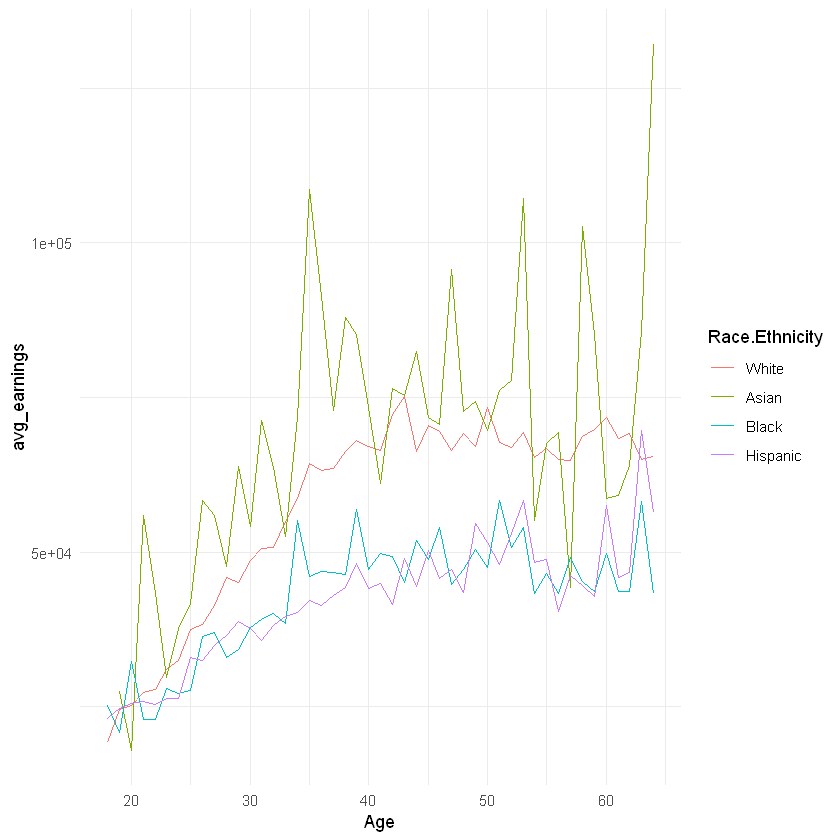

In [40]:
# How does average earnings look across ages and split by ethnicity?
lma_filtered_ethnicity %>%
  group_by(Age, Race.Ethnicity) %>%
  summarise(avg_earnings = mean(Earnings.Past.12.Months)) %>%
  ggplot(aes(x = Age, y = avg_earnings, color = Race.Ethnicity)) +
  geom_line() + 
  theme_minimal()

#### White, Black and Hispanic have in general upward trending graphs

#### Asian appears more variable across ages

#### Shape indicates quadradic for Age

### Updated Econometric Estimates

In [41]:
# Add Age^2, ln(Earnings.Past.12.Months)
updated <- lm(log(Earnings.Past.12.Months) ~ Age + I(Age^2) + Female + Married + Educational.Attainment + Race.Ethnicity, data = lma_filtered_ethnicity)
summary(updated)


Call:
lm(formula = log(Earnings.Past.12.Months) ~ Age + I(Age^2) + 
    Female + Married + Educational.Attainment + Race.Ethnicity, 
    data = lma_filtered_ethnicity)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06302 -0.32844 -0.02557  0.29461  2.74961 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                8.897e+00  4.325e-02 205.698
Age                                        6.310e-02  2.045e-03  30.851
I(Age^2)                                  -6.118e-04  2.364e-05 -25.886
FemaleFemale                              -2.648e-01  6.093e-03 -43.454
MarriedMarried                             8.734e-02  6.539e-03  13.358
Educational.AttainmentHigh School Degree   1.609e-01  1.373e-02  11.716
Educational.AttainmentSome College         3.165e-01  1.392e-02  22.731
Educational.AttainmentAssociates Degree    3.865e-01  1.577e-02  24.504
Educational.AttainmentBachelors Degree     6.641e-01  1.399e-02 

In [42]:
stargazer(updated, type="text")


                                               Dependent variable:     
                                          -----------------------------
                                          log(Earnings.Past.12.Months) 
-----------------------------------------------------------------------
Age                                                 0.063***           
                                                     (0.002)           
                                                                       
I(Age2)                                             -0.001***          
                                                    (0.00002)          
                                                                       
FemaleFemale                                        -0.265***          
                                                     (0.006)           
                                                                       
MarriedMarried                                      0.087***   

### Models by Ethnicity

In [43]:
# Create 4 models - one for each ethnicity (White, Asian, Black, Hispanic)
lma_white <- lm(log(Earnings.Past.12.Months) ~ Age + I(Age^2) + Female + Married + Educational.Attainment, data = lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "White",])
summary(lma_white)



Call:
lm(formula = log(Earnings.Past.12.Months) ~ Age + I(Age^2) + 
    Female + Married + Educational.Attainment, data = lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == 
    "White", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06830 -0.33215 -0.02354  0.29668  2.78265 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                8.766e+00  5.292e-02 165.645
Age                                        7.021e-02  2.434e-03  28.847
I(Age^2)                                  -6.839e-04  2.796e-05 -24.457
FemaleFemale                              -2.944e-01  7.177e-03 -41.025
MarriedMarried                             1.023e-01  7.770e-03  13.164
Educational.AttainmentHigh School Degree   1.291e-01  2.048e-02   6.305
Educational.AttainmentSome College         2.851e-01  2.063e-02  13.817
Educational.AttainmentAssociates Degree    3.448e-01  2.223e-02  15.511
Educational.AttainmentBachelo

In [44]:
lma_black <- lm(log(Earnings.Past.12.Months) ~ Age + I(Age^2) + Female + Married + Educational.Attainment, lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Black",])
summary(lma_black)


Call:
lm(formula = log(Earnings.Past.12.Months) ~ Age + I(Age^2) + 
    Female + Married + Educational.Attainment, data = lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == 
    "Black", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87691 -0.29731 -0.03552  0.28072  2.48242 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                9.012e+00  1.256e-01  71.756
Age                                        5.513e-02  6.027e-03   9.147
I(Age^2)                                  -5.401e-04  6.998e-05  -7.717
FemaleFemale                              -1.510e-01  1.799e-02  -8.398
MarriedMarried                             7.369e-02  1.820e-02   4.048
Educational.AttainmentHigh School Degree   7.871e-02  3.772e-02   2.087
Educational.AttainmentSome College         2.335e-01  3.771e-02   6.191
Educational.AttainmentAssociates Degree    3.129e-01  4.458e-02   7.018
Educational.AttainmentBachelo

In [45]:
lma_asian <- lm(log(Earnings.Past.12.Months) ~ Age + I(Age^2) + Female + Married + Educational.Attainment, data = lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Asian",])
summary(lma_asian)


Call:
lm(formula = log(Earnings.Past.12.Months) ~ Age + I(Age^2) + 
    Female + Married + Educational.Attainment, data = lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == 
    "Asian", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63083 -0.36917  0.00407  0.33675  2.46019 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                8.9377973  0.2289804  39.033
Age                                        0.0597279  0.0108786   5.490
I(Age^2)                                  -0.0006141  0.0001249  -4.917
FemaleFemale                              -0.1971861  0.0286830  -6.875
MarriedMarried                             0.0453526  0.0337989   1.342
Educational.AttainmentHigh School Degree   0.1076872  0.0661956   1.627
Educational.AttainmentSome College         0.3828855  0.0671906   5.698
Educational.AttainmentAssociates Degree    0.4467246  0.0746197   5.987
Educational.AttainmentBachelo

In [46]:
lma_hispanic <- lm(log(Earnings.Past.12.Months) ~ Age + I(Age^2) + Female + Married + Educational.Attainment, data = lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == "Hispanic",])
summary(lma_hispanic)


Call:
lm(formula = log(Earnings.Past.12.Months) ~ Age + I(Age^2) + 
    Female + Married + Educational.Attainment, data = lma_filtered_ethnicity[lma_filtered_ethnicity$Race.Ethnicity == 
    "Hispanic", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46486 -0.30554 -0.03858  0.27204  2.16689 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                9.278e+00  1.019e-01  91.086
Age                                        3.842e-02  5.194e-03   7.396
I(Age^2)                                  -3.425e-04  6.241e-05  -5.487
FemaleFemale                              -1.825e-01  1.658e-02 -11.013
MarriedMarried                             5.044e-02  1.694e-02   2.978
Educational.AttainmentHigh School Degree   2.075e-01  2.227e-02   9.318
Educational.AttainmentSome College         3.279e-01  2.372e-02  13.820
Educational.AttainmentAssociates Degree    4.880e-01  3.287e-02  14.846
Educational.AttainmentBach


### Residual Diagnostics by visual inspection

### Prelim Model  

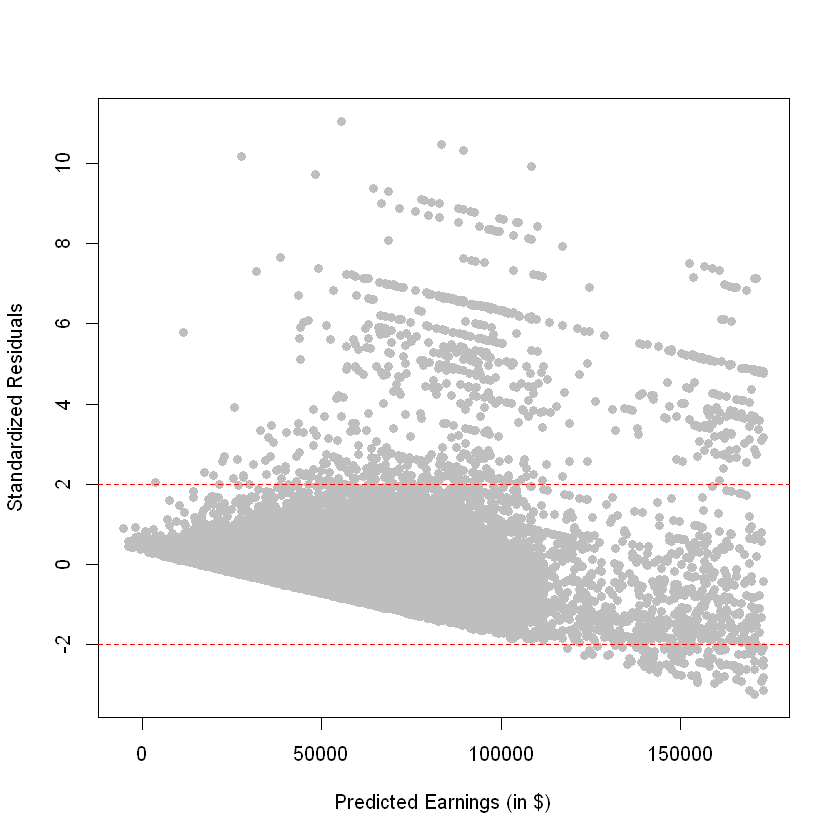

In [47]:
# Preliminary Model 
# Standardized residuals plotted against predicted values
standardized.residual <- rstandard(prelim)
predicted   <- predict(prelim)
plot(standardized.residual~ predicted, col = "grey", pch = 19, 
     xlab= "Predicted Earnings (in $)", ylab = "Standardized Residuals")
abline(h =  2, lty = 2, col = "red")
abline(h = -2, lty =2, col = "red")
mtext ("Standardized Residulas vs. Predicted Earnings \n (Preliminary Model)", font =2,  outer = TRUE)

#### Heteroscedasticity is present as the residuals have patterns
#### Residual Diagnostics by BPG test : Prelim Model   

In [48]:
## BPG test - Prelim 
bpg_prelim <- bptest(prelim) 
bpg_prelim


	studentized Breusch-Pagan test

data:  prelim
BP = 1634.5, df = 13, p-value < 2.2e-16


#### Heteroscedasticity is present, as supported by a stat-sig. p-value
### Updated Model

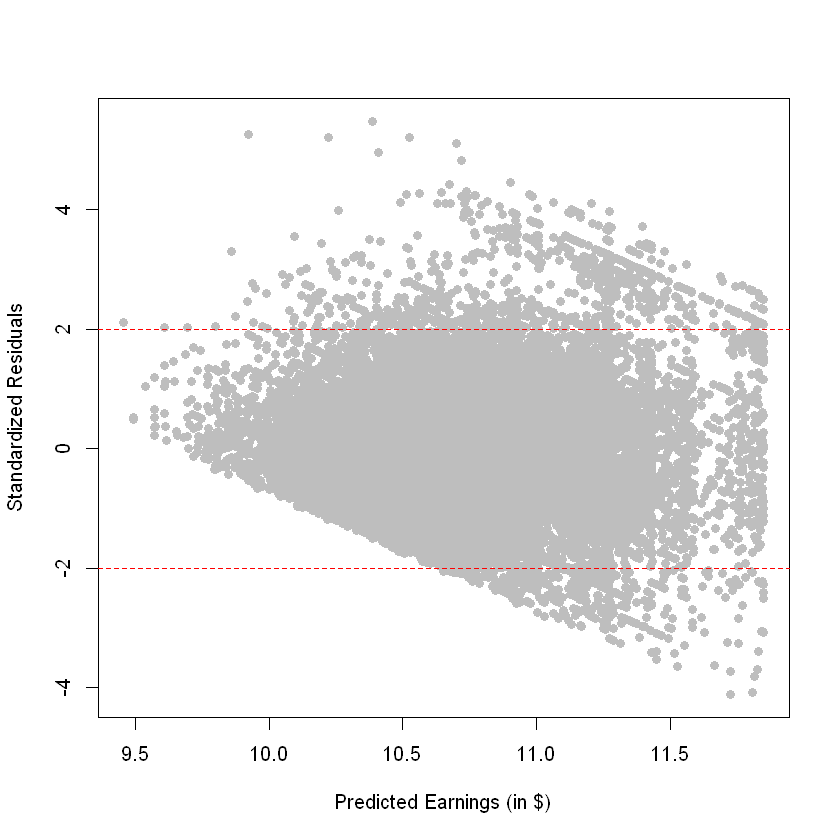

In [49]:
# Updated Model 
# Standardized residuals plotted against predicted values
standardized.residual2 <- rstandard(updated)
predicted2   <- predict(updated)
plot(standardized.residual2 ~ predicted2, col = "grey", pch = 19, 
     xlab= "Predicted Earnings (in $)", ylab = "Standardized Residuals")
abline(h =  2, lty = 2, col = "red")
abline(h = -2, lty =2, col = "red")
mtext ("Standardized Residulas vs. Predicted Earnings \n (Updated Model)", font =2,  outer = TRUE)

#### Can't reject Heteroscedasticity by visual inspection, althoughly model has improved over the prelim 
#### Residual Diagnostics by BPG test : Updated Model   

In [50]:
# BPG test - Prelim 
bpg_updated <- bptest(updated) 
bpg_updated


	studentized Breusch-Pagan test

data:  updated
BP = 1159.2, df = 14, p-value < 2.2e-16


#### Heteroscedasticity still present, as supported by a stat-sig. p-value
### Robust Errors

In [51]:
(sandwich_se <- diag(vcovHC(updated, type = "HC"))^0.5)

(Intercept) 
                             0.0400991475 
                                      Age 
                             0.0019611345 
                                 I(Age^2) 
                             0.0000231623 
                             FemaleFemale 
                             0.0060231912 
                           MarriedMarried 
                             0.0064058070 
 Educational.AttainmentHigh School Degree 
                             0.0121209878 
       Educational.AttainmentSome College 
                             0.0124896806 
  Educational.AttainmentAssociates Degree 
                             0.0142799022 
   Educational.AttainmentBachelors Degree 
                             0.0131121299 
Educational.AttainmentProfessional Degree 
                             0.0288414845 
     Educational.AttainmentMasters Degree 
                             0.0151515132 
          Educational.AttainmentDoctorate 
                             0.0302703009 
                      Race.EthnicityAsian 
                             0.0147412990 
                      Race.EthnicityBlack 
                             0.0096367549 
                   Race.EthnicityHispanic 
                             0.0092936736

#### Non-Hispanic White

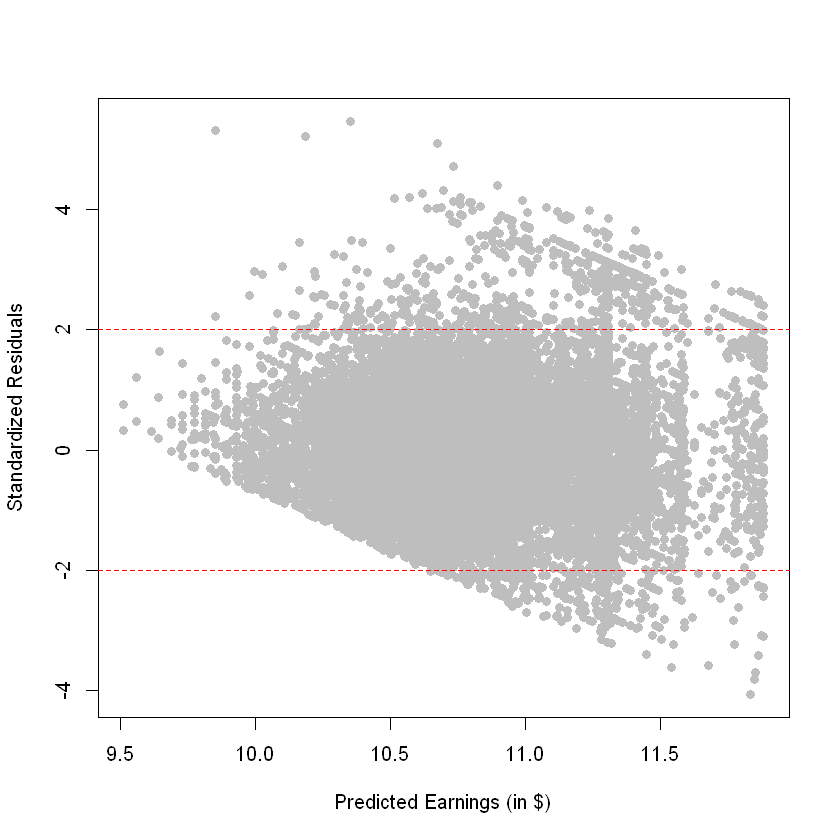

In [52]:
# Non-Hispanic White Model 
# Standardized residuals plotted against predicted values
standardized.residual2 <- rstandard(lma_white)
predicted2   <- predict(lma_white)
plot(standardized.residual2 ~ predicted2, col = "grey", pch = 19, 
     xlab= "Predicted Earnings (in $)", ylab = "Standardized Residuals")
abline(h =  2, lty = 2, col = "red")
abline(h = -2, lty =2, col = "red")
mtext ("Standardized Residulas vs. Predicted Earnings \n (Non-Hispanic White Model)", font =2,  outer = TRUE)

In [53]:
# BPG test - Prelim 
bpg_white <- bptest(lma_white) 
bpg_white


	studentized Breusch-Pagan test

data:  lma_white
BP = 777.37, df = 11, p-value < 2.2e-16


#### Heteroscedasticity still present, as supported by a stat-sig. p-value
### Robust Errors

In [54]:
(sandwich_se <- diag(vcovHC(lma_white, type = "HC"))^0.5)

(Intercept) 
                             4.865224e-02 
                                      Age 
                             2.326494e-03 
                                 I(Age^2) 
                             2.731918e-05 
                             FemaleFemale 
                             7.081776e-03 
                           MarriedMarried 
                             7.644229e-03 
 Educational.AttainmentHigh School Degree 
                             1.807587e-02 
       Educational.AttainmentSome College 
                             1.833006e-02 
  Educational.AttainmentAssociates Degree 
                             1.981915e-02 
   Educational.AttainmentBachelors Degree 
                             1.868118e-02 
Educational.AttainmentProfessional Degree 
                             3.393728e-02 
     Educational.AttainmentMasters Degree 
                             2.072161e-02 
          Educational.AttainmentDoctorate 
                             3.763975e-02

#### Black

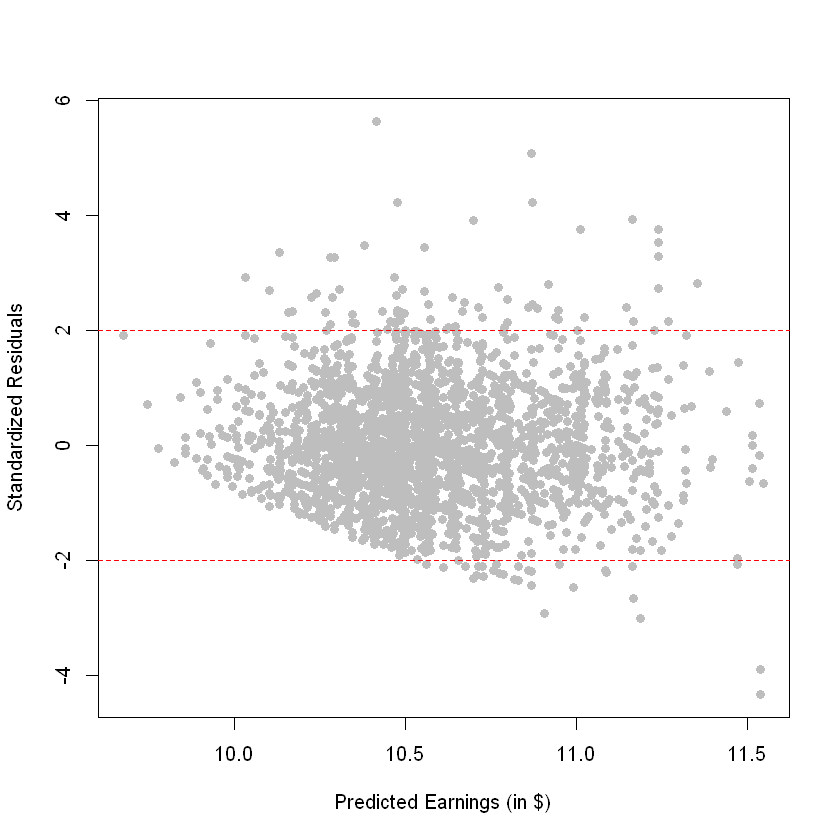

In [55]:
# Black Model 
# Standardized residuals plotted against predicted values
standardized.residual2 <- rstandard(lma_black)
predicted2   <- predict(lma_black)
plot(standardized.residual2 ~ predicted2, col = "grey", pch = 19, 
     xlab= "Predicted Earnings (in $)", ylab = "Standardized Residuals")
abline(h =  2, lty = 2, col = "red")
abline(h = -2, lty =2, col = "red")
mtext ("Standardized Residulas vs. Predicted Earnings \n (Black Model)", font =2,  outer = TRUE)

In [56]:
# BPG test - Prelim 
bpg_white <- bptest(lma_black) 
bpg_white


	studentized Breusch-Pagan test

data:  lma_black
BP = 76.634, df = 11, p-value = 6.579e-12


#### Heteroscedasticity still present, as supported by a stat-sig. p-value
### Robust Errors

In [57]:
(sandwich_se <- diag(vcovHC(lma_black, type = "HC"))^0.5)

(Intercept) 
                             1.147603e-01 
                                      Age 
                             5.639691e-03 
                                 I(Age^2) 
                             6.651925e-05 
                             FemaleFemale 
                             1.836966e-02 
                           MarriedMarried 
                             1.847720e-02 
 Educational.AttainmentHigh School Degree 
                             3.954387e-02 
       Educational.AttainmentSome College 
                             3.953827e-02 
  Educational.AttainmentAssociates Degree 
                             4.626721e-02 
   Educational.AttainmentBachelors Degree 
                             4.318253e-02 
Educational.AttainmentProfessional Degree 
                             1.376477e-01 
     Educational.AttainmentMasters Degree 
                             4.768716e-02 
          Educational.AttainmentDoctorate 
                             8.491214e-02

### Asian

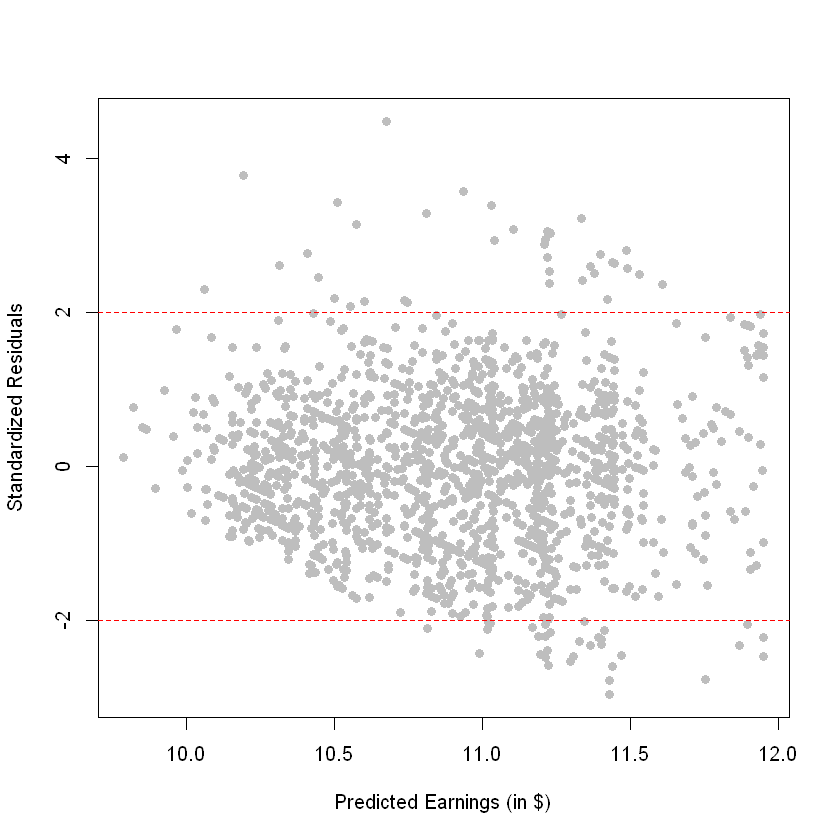

In [58]:
# Asian Model 
# Standardized residuals plotted against predicted values
standardized.residual2 <- rstandard(lma_asian)
predicted2   <- predict(lma_asian)
plot(standardized.residual2 ~ predicted2, col = "grey", pch = 19, 
     xlab= "Predicted Earnings (in $)", ylab = "Standardized Residuals")
abline(h =  2, lty = 2, col = "red")
abline(h = -2, lty =2, col = "red")
mtext ("Standardized Residulas vs. Predicted Earnings \n (Asian Model)", font =2,  outer = TRUE)

In [59]:
# BPG test - Prelim 
bpg_white <- bptest(lma_asian) 
bpg_white


	studentized Breusch-Pagan test

data:  lma_asian
BP = 55.013, df = 11, p-value = 7.708e-08


#### Heteroscedasticity still present, as supported by a stat-sig. p-value

### Robust Errors

In [60]:
(sandwich_se <- diag(vcovHC(lma_asian, type = "HC"))^0.5)

(Intercept) 
                             0.2205714587 
                                      Age 
                             0.0109111818 
                                 I(Age^2) 
                             0.0001275731 
                             FemaleFemale 
                             0.0280953491 
                           MarriedMarried 
                             0.0317392700 
 Educational.AttainmentHigh School Degree 
                             0.0548311542 
       Educational.AttainmentSome College 
                             0.0566053712 
  Educational.AttainmentAssociates Degree 
                             0.0686728258 
   Educational.AttainmentBachelors Degree 
                             0.0522521915 
Educational.AttainmentProfessional Degree 
                             0.0900599844 
     Educational.AttainmentMasters Degree 
                             0.0557914524 
          Educational.AttainmentDoctorate 
                             0.0824499907

### Hispanic

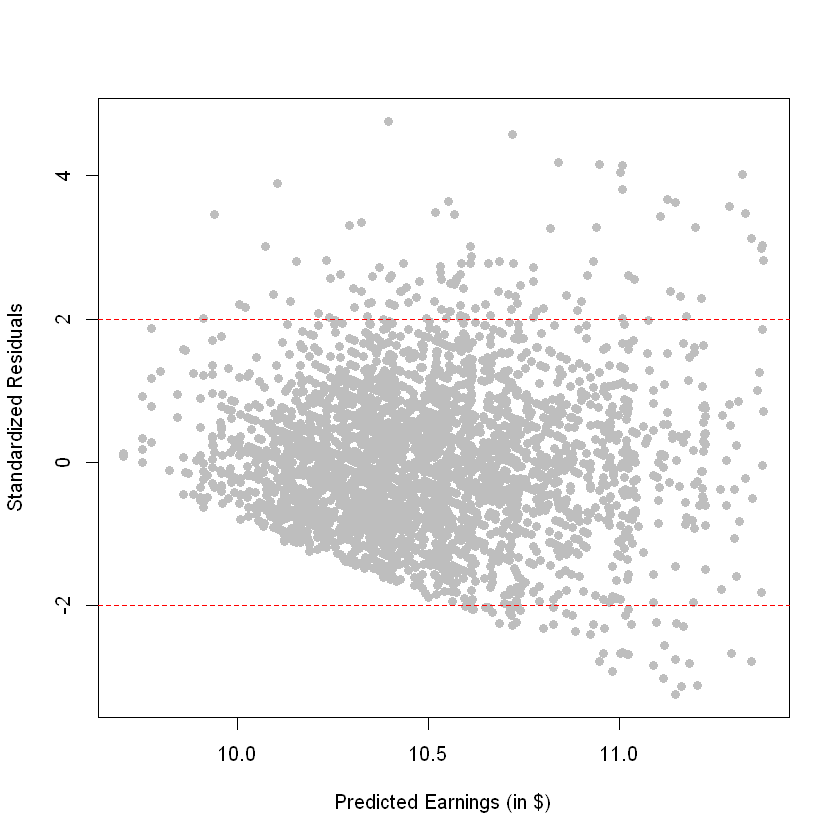

In [61]:
##==## Hispanic Model 
#==# Standardized residuals plotted against predicted values
standardized.residual2 <- rstandard(lma_hispanic)
predicted2   <- predict(lma_hispanic)
plot(standardized.residual2 ~ predicted2, col = "grey", pch = 19, 
     xlab= "Predicted Earnings (in $)", ylab = "Standardized Residuals")
abline(h =  2, lty = 2, col = "red")
abline(h = -2, lty =2, col = "red")
mtext ("Standardized Residulas vs. Predicted Earnings \n (Hispanic Model)", font =2,  outer = TRUE)

In [62]:
# BPG test - Prelim 
bpg_white <- bptest(lma_hispanic) 
bpg_white


	studentized Breusch-Pagan test

data:  lma_hispanic
BP = 226.91, df = 11, p-value < 2.2e-16


#### Heteroscedasticity still present, as supported by a stat-sig. p-value

### Robust Errors

In [63]:
(sandwich_se <- diag(vcovHC(lma_hispanic, type = "HC"))^0.5)

(Intercept) 
                             9.565298e-02 
                                      Age 
                             5.042802e-03 
                                 I(Age^2) 
                             6.213118e-05 
                             FemaleFemale 
                             1.640230e-02 
                           MarriedMarried 
                             1.671545e-02 
 Educational.AttainmentHigh School Degree 
                             1.969304e-02 
       Educational.AttainmentSome College 
                             2.294878e-02 
  Educational.AttainmentAssociates Degree 
                             3.159690e-02 
   Educational.AttainmentBachelors Degree 
                             2.973065e-02 
Educational.AttainmentProfessional Degree 
                             1.104595e-01 
     Educational.AttainmentMasters Degree 
                             4.337270e-02 
          Educational.AttainmentDoctorate 
                             1.685551e-01

#### Ethnicity Models in Table

In [64]:
stargazer(lma_white, lma_black, lma_asian, lma_hispanic, type="text", 
          column.labels = c("White", "Black", "Asian", "Hispanic"), 
          dep.var.labels = c("log(Earnings)"), 
          covariate.labels = c("Age", "Age*Age", "Female", "Married", "High School Degree", "Some College", "Associates Degree", "Bachelors Degree", "Professional Degree", "Masters Degree", "Doctorate", "Constant"),
          header=FALSE)


                                                               Dependent variable:                                            
                    ----------------------------------------------------------------------------------------------------------
                                                                  log(Earnings)                                               
                               White                      Black                     Asian                    Hispanic         
                                (1)                        (2)                       (3)                       (4)            
------------------------------------------------------------------------------------------------------------------------------
Age                          0.070***                   0.055***                  0.060***                   0.038***         
                              (0.002)                    (0.006)                   (0.011)                   (

### Plots of premia to education

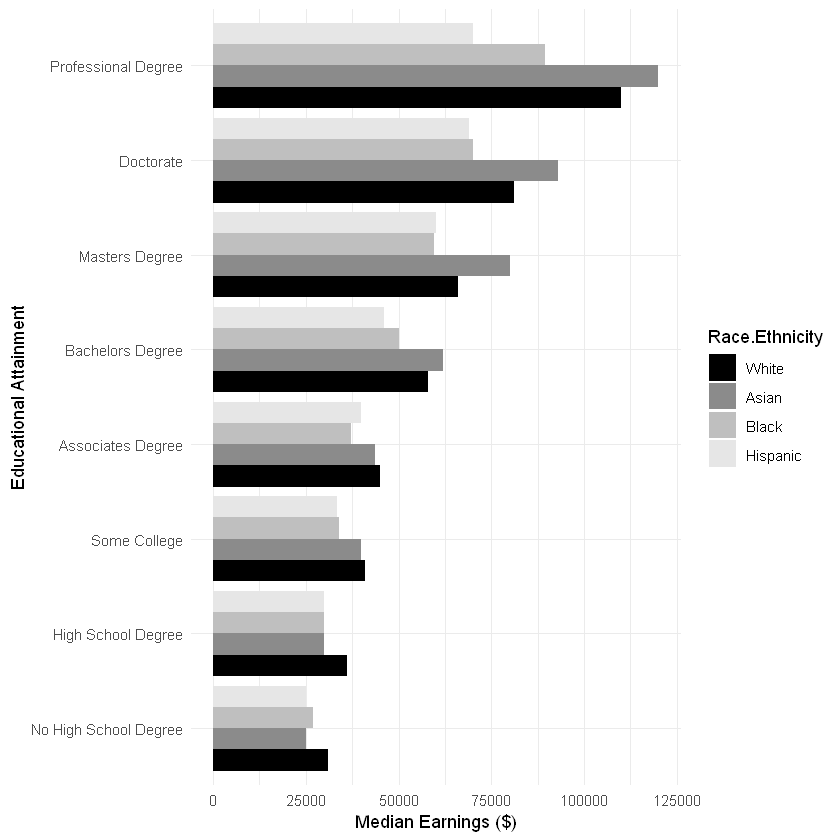

In [65]:
lma_filtered_ethnicity %>%
  group_by(Educational.Attainment, Race.Ethnicity) %>%
  summarise(median_earnings = median(Earnings.Past.12.Months)) %>%
  ggplot(aes(x = Educational.Attainment, y = median_earnings, fill = Race.Ethnicity)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_grey(start = 0, end = .9) +
  scale_x_discrete(name = "Educational Attainment", limit = c("No High School Degree", "High School Degree", "Some College", "Associates Degree", "Bachelors Degree", "Masters Degree", "Doctorate", "Professional Degree")) +
  scale_y_continuous(name ="Median Earnings ($)") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle= 0)) +
  coord_flip()

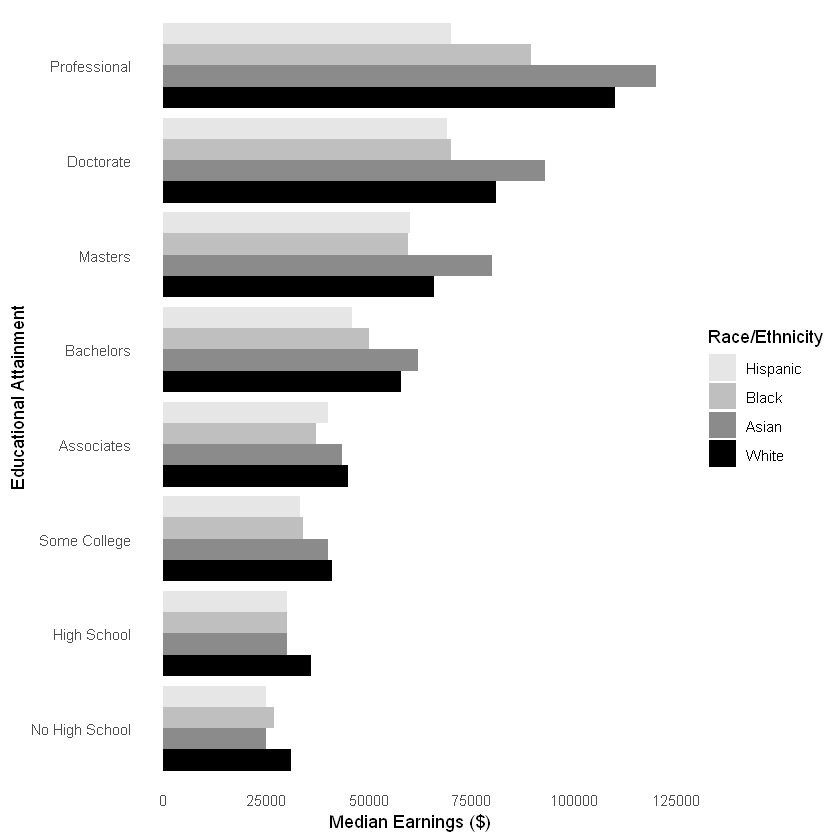

In [66]:
lma_filtered_ethnicity %>%
  group_by(Educational.Attainment, Race.Ethnicity) %>%
  summarise(median_earnings = median(Earnings.Past.12.Months)) %>%
  ggplot(aes(x = Educational.Attainment, y = median_earnings, fill = Race.Ethnicity)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_grey(start = 0, end = .9, breaks = c("Hispanic", "Black", "Asian", "White")) +
  scale_x_discrete(name = "Educational Attainment", limit = c("No High School Degree", "High School Degree", "Some College", "Associates Degree", "Bachelors Degree", "Masters Degree", "Doctorate", "Professional Degree"), labels = c("No High School", "High School", "Some College", "Associates", "Bachelors", "Masters", "Doctorate", "Professional")) + 
  scale_y_continuous(name ="Median Earnings ($)") +
  guides(fill=guide_legend(title="Race/Ethnicity")) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
  coord_flip()

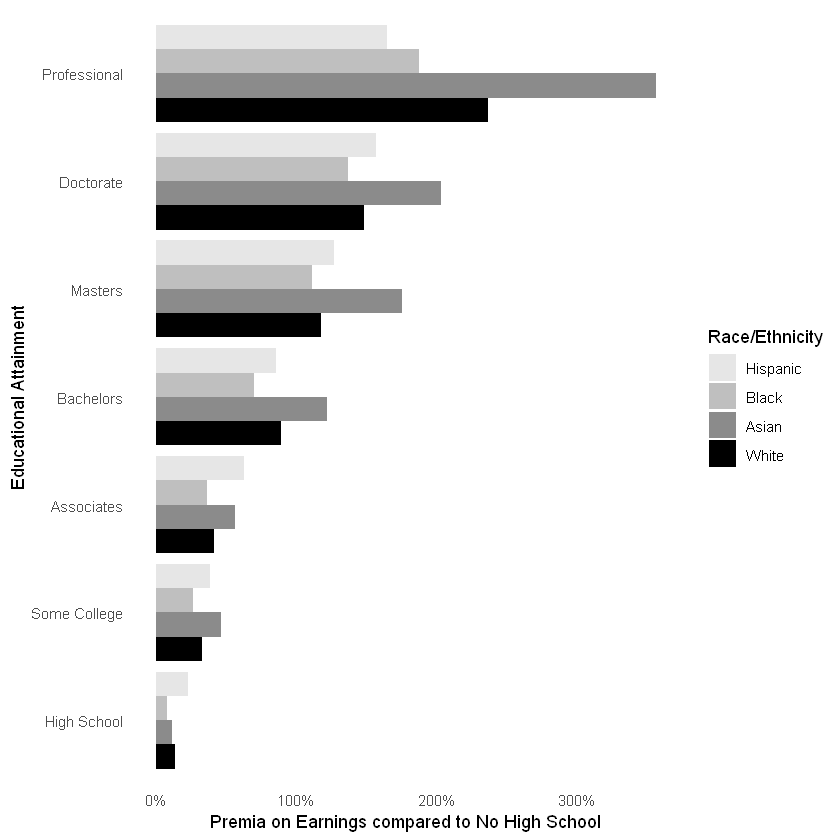

In [67]:
returns_to_earnings <- lma_filtered_ethnicity %>%
  # filter(Educational.Attainment %in% c('No High School Degree', 'High School Degree')) %>%
  group_by(Educational.Attainment, Race.Ethnicity) %>%
  summarise(median_earnings = median(Earnings.Past.12.Months)) 

coeff_as_percentage <- c(0, 0, 0, 0
                         , round(exp(lma_white$coefficients["Educational.AttainmentHigh School Degree"]) - 1, 3),	round(exp(lma_asian$coefficients["Educational.AttainmentHigh School Degree"]) - 1, 3), round(exp(lma_black$coefficients["Educational.AttainmentHigh School Degree"]) - 1, 3), round(exp(lma_hispanic$coefficients["Educational.AttainmentHigh School Degree"]) - 1, 3)
                         , round(exp(lma_white$coefficients["Educational.AttainmentSome College"]) - 1, 3),	round(exp(lma_asian$coefficients["Educational.AttainmentSome College"]) - 1, 3), round(exp(lma_black$coefficients["Educational.AttainmentSome College"]) - 1, 3), round(exp(lma_hispanic$coefficients["Educational.AttainmentSome College"]) - 1, 3)
                         , round(exp(lma_white$coefficients["Educational.AttainmentAssociates Degree"]) - 1, 3),	round(exp(lma_asian$coefficients["Educational.AttainmentAssociates Degree"]) - 1, 3), round(exp(lma_black$coefficients["Educational.AttainmentAssociates Degree"]) - 1, 3), round(exp(lma_hispanic$coefficients["Educational.AttainmentAssociates Degree"]) - 1, 3)
                         , round(exp(lma_white$coefficients["Educational.AttainmentBachelors Degree"]) - 1, 3),	round(exp(lma_asian$coefficients["Educational.AttainmentBachelors Degree"]) - 1, 3), round(exp(lma_black$coefficients["Educational.AttainmentBachelors Degree"]) - 1, 3), round(exp(lma_hispanic$coefficients["Educational.AttainmentBachelors Degree"]) - 1, 3)
                         , round(exp(lma_white$coefficients["Educational.AttainmentProfessional Degree"]) - 1, 3),	round(exp(lma_asian$coefficients["Educational.AttainmentProfessional Degree"]) - 1, 3), round(exp(lma_black$coefficients["Educational.AttainmentProfessional Degree"]) - 1, 3), round(exp(lma_hispanic$coefficients["Educational.AttainmentProfessional Degree"]) - 1, 3)
                         , round(exp(lma_white$coefficients["Educational.AttainmentMasters Degree"]) - 1, 3),	round(exp(lma_asian$coefficients["Educational.AttainmentMasters Degree"]) - 1, 3), round(exp(lma_black$coefficients["Educational.AttainmentMasters Degree"]) - 1, 3), round(exp(lma_hispanic$coefficients["Educational.AttainmentMasters Degree"]) - 1, 3)
                         , round(exp(lma_white$coefficients["Educational.AttainmentDoctorate"]) - 1, 3),	round(exp(lma_asian$coefficients["Educational.AttainmentDoctorate"]) - 1, 3), round(exp(lma_black$coefficients["Educational.AttainmentDoctorate"]) - 1, 3), round(exp(lma_hispanic$coefficients["Educational.AttainmentDoctorate"]) - 1, 3))

returns_to_earnings %>%
  ungroup() %>%
  arrange(Educational.Attainment, Race.Ethnicity) %>%
  mutate(percentage = coeff_as_percentage) %>%
  ggplot(aes(x = Educational.Attainment, y = percentage, fill = Race.Ethnicity)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_grey(start = 0, end = .9, breaks = c("Hispanic", "Black", "Asian", "White")) +
  scale_x_discrete(name = "Educational Attainment", limit = c("High School Degree", "Some College", "Associates Degree", "Bachelors Degree", "Masters Degree", "Doctorate", "Professional Degree"), labels = c("High School", "Some College", "Associates", "Bachelors", "Masters", "Doctorate", "Professional")) + 
  scale_y_continuous(name ="Premia on Earnings compared to No High School",labels = scales::percent) +
  guides(fill=guide_legend(title="Race/Ethnicity")) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
  coord_flip()